In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import itertools
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import BaggingClassifier 
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
Label = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
Label

FileNotFoundError: [Errno 2] File b'0bf8bc6e-30d0-4c50-956a-603fc693d966.csv' does not exist: b'0bf8bc6e-30d0-4c50-956a-603fc693d966.csv'

In [272]:
Training = pd.read_csv("4910797b-ee55-40a7-8668-10efd5c1b960.csv")
#.75
# Training
#alot of features that are cat
# log = dummy 
# random forest = no need to use dummies
# long and lat where has a concentration of wells geo map 
# folium geo pandas  
df = pd.merge(Training, Label, on='id')

In [273]:
Test = pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
#.25
# go back later to Test on this data for the challange 

In [274]:
len(Test)/len(Training)

0.25

In [275]:
df.dropna(inplace=True)

In [276]:
df

id  amount_tsh date_recorded                   funder  gps_height  \
0      69572      6000.0    2011-03-14                    Roman        1390   
2      34310        25.0    2013-02-25             Lottery Club         686   
5       9944        20.0    2011-03-13      Mkinga Distric Coun           0   
13     50495         0.0    2013-03-15  Lawatefuka Water Supply        1368   
14     53752         0.0    2012-10-20                    Biore           0   
...      ...         ...           ...                      ...         ...   
59381  67885         0.0    2011-03-16      Mkinga Distric Coun           0   
59382  47002         6.0    2013-08-03                Ces(gmbh)        1383   
59391  44885         0.0    2013-08-03   Government Of Tanzania         540   
59395  60739        10.0    2013-05-03          Germany Republi        1210   
59396  27263      4700.0    2011-05-07              Cefa-njombe        1212   

                  installer  longitude  latitude              wpt_name  \
0                     Roman  34.938093 -9.856322                  none   
2              World vision  37.460664 -3.821329           Kwa Mahundi   
5                       DWE  39.172796 -4.765587                Tajiri   
13     Lawatefuka water sup  37.092574 -3.181783  Kwa John Izack Mmari   
14                   WEDECO  34.364073 -3.629333             Mwabasabi   
...                     ...        ...       ...                   ...   
59381                   DWE  38.835001 -4.880204            Mijohoroni   
59382                   DWE  37.454759 -3.323599        Kwa Luka Msaki   
59391            Government  38.044070 -4.272218                   Kwa   
59395                   CES  37.169807 -3.253847   Area Three Namba 27   
59396                  Cefa  35.249991 -9.070629     Kwa Yahona Kuvala   

       num_private       basin   subvillage       region  region_code  \
0                0  Lake Nyasa     Mnyusi B       Iringa           11   
2                0     Pangani      Majengo      Manyara           21   
5                0     Pangani  Moa/Mwereme        Tanga            4   
13               0     Pangani      Omarini  Kilimanjaro            3   
14               0    Internal    Mwabasabi    Shinyanga           17   
...            ...         ...          ...          ...          ...   
59381            0     Pangani    Mtakuja A        Tanga            4   
59382            0     Pangani     Yamu Juu  Kilimanjaro            3   
59391            0     Pangani   Maore Kati  Kilimanjaro            3   
59395            0     Pangani     Kiduruni  Kilimanjaro            3   
59396            0      Rufiji     Igumbilo       Iringa           11   

       district_code          lga                ward  population  \
0                  5       Ludewa            Mundindi         109   
2                  4    Simanjiro             Ngorika         250   
5                  8       Mkinga                 Moa           1   
13                 7         Siha      Siha Kaskazini           1   
14                 6        Meatu               Nkoma           0   
...              ...          ...                 ...         ...   
59381              8       Mkinga             Maramba         360   
59382              4  Moshi Rural  Kirua Vunjo Kusini           1   
59391              3         Same               Maore         210   
59395              5          Hai    Masama Magharibi         125   
59396              4       Njombe              Ikondo          56   

      public_meeting              recorded_by scheme_management  \
0               True  GeoData Consultants Ltd               VWC   
2               True  GeoData Consultants Ltd               VWC   
5               True  GeoData Consultants Ltd               VWC   
13              True  GeoData Consultants Ltd       Water Board   
14              True  GeoData Consultants Ltd               WUG   
...              ...                      ...               ... 

In [277]:
lb_make = LabelEncoder()
df["status_group_code"] = lb_make.fit_transform(df["status_group"])

In [278]:
df.corr()

id  amount_tsh  gps_height  longitude  latitude  \
id                 1.000000   -0.011505   -0.004875  -0.002974  0.002878   
amount_tsh        -0.011505    1.000000    0.062406   0.013325 -0.069767   
gps_height        -0.004875    0.062406    1.000000   0.068421 -0.086732   
longitude         -0.002974    0.013325    0.068421   1.000000 -0.263880   
latitude           0.002878   -0.069767   -0.086732  -0.263880  1.000000   
num_private        0.003306    0.005950   -0.007321   0.068497  0.016907   
region_code       -0.001321   -0.022106   -0.178807  -0.026101 -0.276348   
district_code      0.003294   -0.032581   -0.122709   0.049015 -0.056429   
population         0.002338    0.015412    0.078758   0.023535 -0.020235   
construction_year -0.004309    0.057624    0.608283   0.366353 -0.203453   
status_group_code  0.006897   -0.066512   -0.188173  -0.052169  0.054535   

                   num_private  region_code  district_code  population  \
id                    0.003306    -0.001321       0.003294    0.002338   
amount_tsh            0.005950    -0.022106      -0.032581    0.015412   
gps_height           -0.007321    -0.178807      -0.122709    0.078758   
longitude             0.068497    -0.026101       0.049015    0.023535   
latitude              0.016907    -0.276348      -0.056429   -0.020235   
num_private           1.000000    -0.047831      -0.023192   -0.001361   
region_code          -0.047831     1.000000       0.531796    0.133423   
district_code        -0.023192     0.531796       1.000000    0.065529   
population           -0.001361     0.133423       0.065529    1.000000   
construction_year     0.049809    -0.011408      -0.029766    0.214269   
status_group_code    -0.009874     0.086749       0.031684    0.006193   

                   construction_year  status_group_code  
id                         -0.004309           0.006897  
amount_tsh                  0.057624          -0.066512  
gps_height                  0.608283          -0.188173  
longitude                   0.366353          -0.052169  
latitude                   -0.203453           0.054535  
num_private                 0.049809          -0.009874  
region_code                -0.011408           0.086749  
district_code              -0.029766           0.031684  
population                  0.214269           0.006193  
construction_year           1.000000          -0.151679  
status_group_code          -0.151679           1.000000

In [279]:
df = df.drop(columns= ['id','num_private','funder','extraction_type_group','extraction_type_class','date_recorded','wpt_name','subvillage','lga','ward','recorded_by','scheme_management','management_group','payment_type','source_type','source_class','waterpoint_type_group','management'],axis=1)


In [8]:

# installer region

In [265]:
# for column_name in X.columns:
#     if type(X[column_name]) == str:
#         X[column_name].apply(map(lambda x: x.astype('int64'),df))
# df['funder'] = df['funder'].astype('category')
# df['date_recorded'] = pd.to_datetime(df['date_recorded'])

df

id  amount_tsh  gps_height             installer  longitude  \
0      69572      6000.0        1390                 Roman  34.938093   
2      34310        25.0         686          World vision  37.460664   
5       9944        20.0           0                   DWE  39.172796   
13     50495         0.0        1368  Lawatefuka water sup  37.092574   
14     53752         0.0           0                WEDECO  34.364073   
...      ...         ...         ...                   ...        ...   
59381  67885         0.0           0                   DWE  38.835001   
59382  47002         6.0        1383                   DWE  37.454759   
59391  44885         0.0         540            Government  38.044070   
59395  60739        10.0        1210                   CES  37.169807   
59396  27263      4700.0        1212                  Cefa  35.249991   

       latitude       basin       region  region_code  district_code  \
0     -9.856322  Lake Nyasa       Iringa           11              5   
2     -3.821329     Pangani      Manyara           21              4   
5     -4.765587     Pangani        Tanga            4              8   
13    -3.181783     Pangani  Kilimanjaro            3              7   
14    -3.629333    Internal    Shinyanga           17              6   
...         ...         ...          ...          ...            ...   
59381 -4.880204     Pangani        Tanga            4              8   
59382 -3.323599     Pangani  Kilimanjaro            3              4   
59391 -4.272218     Pangani  Kilimanjaro            3              3   
59395 -3.253847     Pangani  Kilimanjaro            3              5   
59396 -9.070629      Rufiji       Iringa           11              4   

       population public_meeting                            scheme_name  \
0             109           True                                  Roman   
2             250           True            Nyumba ya mungu pipe scheme   
5               1           True                              Zingibali   
13              1           True                             BL Bondeni   
14              0           True                                   None   
...           ...            ...                                    ...   
59381         360           True                     Magati water schem   
59382           1           True  Kirua kahe gravity water supply trust   
59391         210           True                              Hingilili   
59395         125           True                 Losaa Kia water supply   
59396          56           True            Ikondo electrical water sch   

      permit  construction_year extraction_type         payment water_quality  \
0      False               1999         gravity    pay annually          soft   
2       True               2009         gravity  pay per bucket          soft   
5       True               2009     submersible  pay per bucket         salty   
13      True               2009         gravity     pay monthly          soft   
14      True                  0     nira/tanira       never pay          soft   
...      ...                ...             ...             ...           ...   
59381   True               1992         gravity       never pay          soft   
59382   True               2008         gravity  pay per bucket          soft   
59391   True               1967         gravity       never pay          soft   
59395   True               1999         gravity  pay per bucket          soft   
59396   True               1996         gravity    pay annually          soft   

      quality_group      quantity quantity_group        source  \
0              good        enough         enough        spring   
2              good        enough         enough           dam   
5             salty        enough         enough         other   
13             good        enough         enough        spring   
14             good        enough         enough  shallow well  

In [280]:
df.dropna(inplace=True)

In [281]:
# C = df[['num_private','region_code','district_code','construction_year']].astype('category')
# df[['num_private','region_code','district_code','construction_year']] = C

C = df[['public_meeting','permit']].astype('bool')
df[['public_meeting','permit']] = C

In [282]:
df['years_operational'] = df['construction_year'].apply(lambda x: 2020 - x)


In [283]:
df['years_operational'].replace(to_replace=2020,value=100,inplace=True)

    

In [284]:
df.groupby(['status_group','years_operational'])['years_operational'].count()

status_group             years_operational
functional               7                      51
                         8                     359
                         9                     526
                         10                    964
                         11                   1068
                         12                   1290
                         13                    699
                         14                    599
                         15                    331
                         16                    420
                         17                    603
                         18                    525
                         19                    235
                         20                    496
                         21                    546
                         22                    342
                         23                    111
                         24                    135
                         25            

In [285]:
df.drop('construction_year',axis = 1)
dummies = pd.get_dummies(df,columns=['basin','region','scheme_name','quality_group','quantity_group','installer','payment','water_quality','quantity','source', 'waterpoint_type','extraction_type'])




/Users/andrewghan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06487747 0.01131864 0.05856721 ... 0.00349335 0.00051362 0.00026215]


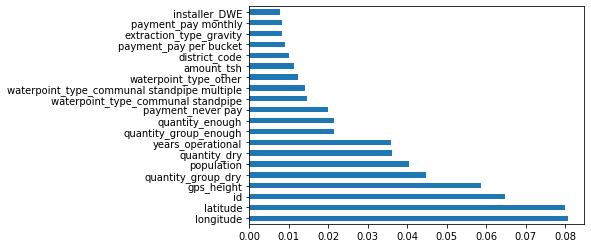

In [291]:
X = dummies.drop(['status_group','status_group_code'], axis = 1)
y= dummies['status_group']
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [292]:
dummies = dummies.drop('construction_year',axis = 1)

KeyError: "['construction_year'] not found in axis"

# EDA

In [104]:

# dummies['district_code'].unique()
# dummies['region_code'].unique()
df2 = dummies 

In [107]:
df2['status_group'] = pd.factorize(dummies.status_group) [0] + 1
# num_private, region_code, district_code, public_meeting, permit, construction_year
df2.corr()

id  amount_tsh  gps_height  \
id                                           1.000000   -0.006200   -0.004988   
amount_tsh                                  -0.006200    1.000000    0.091116   
gps_height                                  -0.004988    0.091116    1.000000   
longitude                                   -0.004629    0.023665    0.136090   
latitude                                     0.004629   -0.066064   -0.082632   
population                                  -0.003454    0.015360    0.121246   
public_meeting                               0.004404    0.018524    0.057646   
permit                                      -0.001329    0.029380    0.064056   
status_group                                 0.000993   -0.048613   -0.117762   
construction_year_0                          0.003177   -0.078952   -0.647506   
construction_year_1960                      -0.002265   -0.003362    0.016630   
construction_year_1961                       0.003047   -0.002292   -0.005639   
construction_year_1962                       0.005808    0.001754    0.017765   
construction_year_1963                       0.002461   -0.004900    0.024127   
construction_year_1964                       0.005291   -0.002781    0.012676   
construction_year_1965                      -0.004404   -0.000273    0.018875   
construction_year_1966                      -0.000505   -0.001980   -0.009948   
construction_year_1967                      -0.002710    0.002165    0.014743   
construction_year_1968                       0.006354   -0.003142    0.007015   
construction_year_1969                       0.001770    0.005806    0.011664   
construction_year_1970                      -0.006437   -0.006380    0.016327   
construction_year_1971                       0.000853    0.004346   -0.012573   
construction_year_1972                       0.000216    0.010627    0.087052   
construction_year_1973                       0.002214   -0.005305    0.009834   
construction_year_1974                       0.003356   -0.000077    0.056746   
construction_year_1975                      -0.000856   -0.007643    0.024286   
construction_year_1976                      -0.002366    0.005424    0.034125   
construction_year_1977                      -0.008808   -0.000407    0.003363   
construction_year_1978                       0.007745   -0.006239    0.096573   
construction_year_1979                      -0.007899    0.004516   -0.012557   
construction_year_1980                       0.001335   -0.006655    0.018710   
construction_year_1981                      -0.003316   -0.005089   -0.000129   
construction_year_1982                      -0.003101   -0.006764    0.012988   
construction_year_1983                       0.000162    0.003412    0.046930   
construction_year_1984                       0.001900    0.008462    0.058589   
construction_year_1985                       0.000265   -0.000296    0.056039   
construction_year_1986                       0.000034    0.018150    0.042087   
construction_year_1987                       0.002936    0.023294    0.037402   
construction_year_1988                       0.001970    0.013198    0.040097   
construction_year_1989                       0.004721    0.004611    0.052062   
construction_year_1990                       0.001019    0.009980    0.094118   
construction_year_1991                      -0.001636    0.003917    0.066997   
construction_year_1992                       0.003263    0.037294    0.052745   
construction_year_1993                      -0.001676    0.028849    0.069048   
construction_year_1994                      -0.002586    0.005423    0.060134   
construction_year_1995                      -0.004145    0.042800    0.053271   
construction_year_1996                       0.006059    0.008750    0.063510   
construction_year_1997                      -0.001430    0.018814    0.017464   
construction_year_1998                       0.002986    0.001773    0.084949   
c

# Train Test Split 


In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Random Forest 

In [294]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)


/Users/andrewghan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [317]:
preds = rfc.predict(X_test)
preds

array(['functional', 'non functional', 'functional needs repair', ...,
       'non functional', 'functional', 'functional'], dtype=object)

In [296]:
print (f1_score(y_test, preds, average='weighted'))

print (accuracy_score(y_test, preds))

print (precision_score(y_test, preds, average='weighted'))

print (recall_score(y_test, preds, average='weighted'))


0.8100806642294512
0.8168744007670182
0.808145488729184
0.8168744007670182


# Grid Search 

In [297]:
max_features = ['auto', 'sqrt','log2']
max_depth = [2,5,10]
min_samples_split = [2,5,10,12]
min_samples_leaf = [1,2,4,5]
bootstrap = [True, False]


param_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               }
param_grid


{'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [2, 5, 10],
 'min_samples_split': [2, 5, 10, 12],
 'min_samples_leaf': [1, 2, 4, 5],
 'bootstrap': [True, False]}

In [298]:
cv_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)

In [310]:
cv_rfc.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'boot

In [312]:
cv_rfc.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [313]:
rfcc = RandomForestClassifier(random_state=42,bootstrap=True, max_depth=10,
                                              max_features='auto',
                                              min_samples_leaf=1,
                                              min_samples_split=2)


In [314]:
rfcc.fit(X_train,y_train)

/Users/andrewghan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [315]:
predict = rfcc.predict(X_test)

In [316]:
print (f1_score(y_test, predict, average='weighted'))

print (accuracy_score(y_test, predict))

print (precision_score(y_test, predict, average='weighted'))

print (recall_score(y_test, predict, average='weighted'))

0.67117058293193
0.7164429530201343
0.7429338067867574
0.7164429530201343


In [300]:
logreg = LogisticRegression(class_weight = 'balanced', verbose=1)

In [301]:
logreg.fit(X_train, y_train)

/Users/andrewghan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrewghan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)

In [302]:
y_predlogreg = logreg.predict(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [303]:
test_f1 = f1_score(y_test, y_predlogreg,
                  average='weighted')
test_f1

0.719613640253425

In [304]:
print(accuracy_score(y_test, y_predlogreg))

print(recall_score(y_test, y_predlogreg, average='weighted'))

print(precision_score(y_test, y_predlogreg, average='weighted'))

0.716203259827421
0.716203259827421
0.7275116275074666


In [305]:
bag = BaggingClassifier(random_state = 1, max_features = 25, n_estimators = 15, max_samples = 100)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=25, max_samples=100, n_estimators=15,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

In [306]:
pred = bag.predict(X_test)
f1_score(y_test, pred, average='weighted')

/Users/andrewghan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4293443701571377

In [307]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
clf_xgb.fit(X_train, y_train)
pred = clf_xgb.predict(X_test)

In [308]:
f1_score(y_test, pred, average='weighted')

0.7516693454456425

In [309]:
print(accuracy_score(y_test, pred))

print(recall_score(y_test, pred, average='weighted'))

print(precision_score(y_test, pred, average='weighted'))

0.7715723873441994
0.7715723873441994
0.766921111966368
